In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
import statistics
%matplotlib inline

In [29]:
class KmeansColorReduction:
    def __init__(self, img, k=5, seed=1):
        assert len(img.shape) == 3, "img dimension is not 3."
        self.img = img
        self.num_classes = k
        self.H, self.W, self.C = img.shape
        self.leaders = self.decide_leaders()
        self.classes = self.init_classes()
        np.random.seed(seed)
    
    def decide_leaders(self):
        leaders = np.zeros((self.num_classes, self.C), dtype=np.float32)
        for k in range(self.num_classes):
            h = np.random.randint(0, self.H)
            w = np.random.randint(0, self.W)
            leaders[k] = self.img[h, w]
        return leaders
    
    def init_classes(self):
        classes = np.random.randint(self.num_classes, size=(self.H, self.W))
        return classes
    
    def next_state(self):
        ns = [0 for i in range(self.num_classes)]
        gs = np.zeros((self.num_classes, 3), dtype=np.float32)
        classes = np.zeros((self.H, self.W))
        for i in range(self.H):
            for j in range(self.W):
                cls = np.argmin([np.linalg.norm(self.img[i, j] - self.leaders[c]) for c in range(self.num_classes)])
                classes[i, j] = cls
                ns[cls] += 1
                gs[cls] += self.img[i, j]
        for i in range(self.num_classes):
            gs[i] /= ns[i]
        return gs, classes, np.any(self.classes != classes)
    
    def reduction(self, max_iter=-1):
        iteration = 0
        while max_iter == -1 or iteration < max_iter:
            iteration += 1
            self.leaders, self.classes, cont = self.next_state()
            if not cont:
                break

In [30]:
class Solver:
    def problem_91(self, img, k=5, seed=0):
        self.kmeans = KmeansColorReduction(img, k, seed)
        self.kmeans.reduction(max_iter=1)
        result_img = self.kmeans.classes * 50
        plt.imshow(result_img, cmap="gray")
        plt.show()

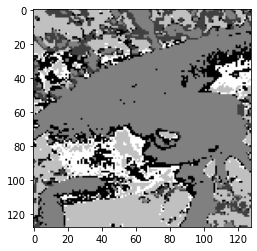

In [31]:
img = cv2.imread("../imori.jpg")
solver = Solver()
solver.problem_91(img, k=5, seed=0)